## Create the machine learning algorithm 

#### Import the relevant libraries 

In [3]:
import numpy as np 
import tensorflow as tf 


#### Data

In [5]:
npz = np.load('Audiobooks_data_train.npz')
train_inputs = npz['inputs'].astype(np.float32)
train_targets = npz['targets'].astype(np.int32)

npz = np.load('Audiobooks_data_validation.npz')
validation_inputs, validation_targets = npz['inputs'].astype(np.float32) , npz['targets'].astype(np.int32)

npz = np.load('Audiobooks_data_test.npz')
test_inputs, test_targets = npz['inputs'].astype(np.float32) , npz['targets'].astype(np.int32)

#### Model

###### Outline, optimizers, loss, early stopping and training

In [ ]:
### Create the DL model
input_size = 10
output_size = 2
hidden_layer_size = 50
model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(output_size, activation='softmax')
])

## Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
batch_size = 100
max_epochs = 100

early_stopping = tf.keras.callbacks.EarlyStopping()
model.fit(train_inputs, train_targets, 
          batch_size=batch_size, epochs=max_epochs,
          callbacks=[early_stopping], 
          validation_data=(validation_inputs, validation_targets), verbose=2)

Epoch 1/100
36/36 - 10s - 274ms/step - accuracy: 0.6479 - loss: 0.6219 - val_accuracy: 0.7383 - val_loss: 0.5058
Epoch 2/100
36/36 - 0s - 13ms/step - accuracy: 0.7564 - loss: 0.4767 - val_accuracy: 0.7987 - val_loss: 0.4163
Epoch 3/100
36/36 - 0s - 12ms/step - accuracy: 0.7809 - loss: 0.4210 - val_accuracy: 0.8188 - val_loss: 0.3734
Epoch 4/100
36/36 - 1s - 18ms/step - accuracy: 0.7879 - loss: 0.3946 - val_accuracy: 0.8143 - val_loss: 0.3536
Epoch 5/100
36/36 - 1s - 15ms/step - accuracy: 0.8080 - loss: 0.3755 - val_accuracy: 0.8412 - val_loss: 0.3378
Epoch 6/100
36/36 - 0s - 14ms/step - accuracy: 0.8005 - loss: 0.3689 - val_accuracy: 0.8098 - val_loss: 0.3271
Epoch 7/100
36/36 - 1s - 18ms/step - accuracy: 0.8103 - loss: 0.3589 - val_accuracy: 0.8322 - val_loss: 0.3316


: 

In [21]:
test_loss, test_accuracy = model.evaluate(test_inputs, test_targets)
print(f"Test loss: {test_loss:.3f}, Test accuracy: {test_accuracy :.3f}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7879 - loss: 0.3833
Test loss: 0.383, Test accuracy: 0.788


In [15]:
import matplotlib.pyplot as plt
import tensorflow as tf

learning_rates = [0.001, 0.01, 0.1]   # try different ones
histories = {}
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)

for lr in learning_rates:
    print(f"\nTraining with learning rate = {lr}")
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(50, activation='relu', input_shape=(10,)),
        tf.keras.layers.Dense(50, activation='relu'),
        tf.keras.layers.Dense(2, activation='softmax')
    ])
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    history = model.fit(
        train_inputs, train_targets,
        batch_size=100,
        epochs=30, 
        callbacks=[early_stopping],# fewer epochs just to compare
        validation_data=(validation_inputs, validation_targets),
        verbose=0
    )
    histories[lr] = history



Training with learning rate = 0.001


C:\Users\anony\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training with learning rate = 0.01

Training with learning rate = 0.1


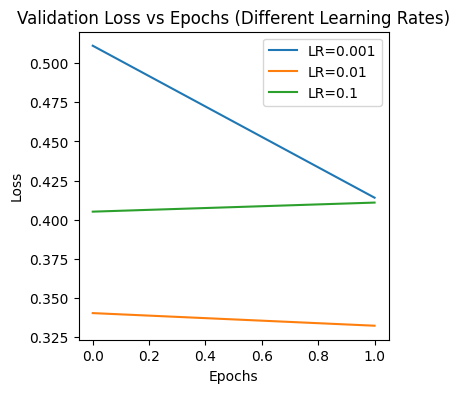

In [14]:
plt.figure(figsize=(4,4))

for lr, history in histories.items():
    plt.plot(history.history['val_loss'], label=f'LR={lr}')

plt.title("Validation Loss vs Epochs (Different Learning Rates)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


### Test the model

In [17]:
test_loss, test_accuracy = model.evaluate(test_inputs, test_targets)
print(f"Test loss: {test_loss:.3f}, Test accuracy: {test_accuracy :.3f}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7545 - loss: 0.4143
Test loss: 0.414, Test accuracy: 0.754
